<a href="https://colab.research.google.com/github/rachanakafle/Data-Analysis-and-Visualization-Projects/blob/main/Correlation_and_autocorrelation_of_nitrogen_phosphorus_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load nitrogen and phosphorus

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "gdrive/My Drive/Dataset/nitrogen_phosphorus.csv"

'gdrive/My Drive/Dataset/nitrogen_phosphorus.csv'


In [ ]:
df_np = pd.read_csv("gdrive/My Drive/Dataset/nitrogen_phosphorus.csv",header=0,parse_dates=[0])

In [ ]:
df_np.head(7)

,timestamp,N,P
0,2019-02-23 00:00:00,90.0,42.0
1,2019-02-23 00:05:00,85.0,58.0
2,2019-02-23 00:10:00,60.0,55.0
3,2019-02-23 00:15:00,74.0,35.0
4,2019-02-23 00:20:00,78.0,42.0
5,2019-02-23 00:25:00,69.0,37.0
6,2019-02-23 00:30:00,69.0,55.0


In [ ]:
df_np.shape

(27904, 3)

### Data Cleaning

In [ ]:
df_np.isna().sum()

timestamp        0
N            23503
P            23503
dtype: int64

In [ ]:

df_np = df_np.dropna()

In [ ]:
df_np.isna().sum()

timestamp    0
N            0
P            0
dtype: int64

In [ ]:
df_np.shape

(4401, 3)

### Visualization of nitrogen and phosphorus

<Figure size 864x864 with 0 Axes>

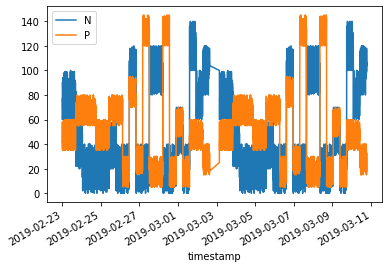

In [ ]:
plt.figure(figsize=(12,12))
df_np.plot(x='timestamp')
plt.show()

### Compute Correlation of nitrogen and phosphorus

In [ ]:
correlation_np = df_np['N'].corr(df_np['P'])
print("Correlation of nitrogen and phosphorus: ", correlation_np.round(2))

Correlation of nitrogen and phosphorus:  -0.23


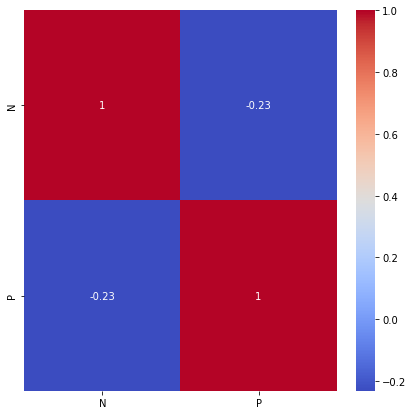

In [ ]:
import seaborn
plt.figure(figsize = (7,7))
seaborn.heatmap(df_np.corr(),annot = True, cmap = 'coolwarm')

### Conclusion
It concluded a slightly negative correlation between nitrogen and phosphorus.

# Compute weekly change in nitrogen

### convert minutely into weekly data

In [ ]:

df_np_weekly = df_np.resample("W",on='timestamp').mean()
df_np_weekly.head()

,N,P
timestamp,,
2019-02-24,44.345486,58.220486
2019-03-03,55.243720,51.634420
2019-03-10,47.914023,53.571136


In [ ]:
nitrogen = df_np_weekly['N'] #series
print(nitrogen.head(7))


timestamp
2019-02-24    44.345486
2019-03-03    55.243720
2019-03-10    47.914023
Freq: W-SUN, Name: N, dtype: float64


In [ ]:
df_nitrogen = pd.DataFrame(temperature, columns=['N']) # give column name 'N"
print(df_nitrogen)

                    N
timestamp            
2019-02-24  44.345486
2019-03-03  55.243720
2019-03-10  47.914023


In [ ]:
weekly_nitrogen_change = df_nitrogen.copy()
print(weekly_nitrogen_change)
weekly_diff = weekly_nitrogen_change.diff()
print(weekly_diff)

                    N
timestamp            
2019-02-24  44.345486
2019-03-03  55.243720
2019-03-10  47.914023
                    N
timestamp            
2019-02-24        NaN
2019-03-03  10.898234
2019-03-10  -7.329697


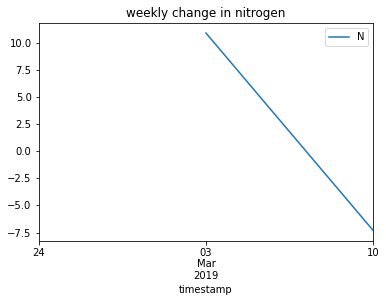

In [ ]:
weekly_diff.plot()
plt.title("weekly change in nitrogen")
plt.show()


### Percentage change in nitrogen

In [ ]:
change_temp = df_nitrogen.pct_change().round(3)
print(change_temp.head(7))

                N
timestamp        
2019-02-24    NaN
2019-03-03  0.246
2019-03-10 -0.133


# Compute weekly change in phosphorus

### convert minutely into weekly data

In [ ]:

df_np_weekly = df_np.resample("W",on='timestamp').mean()
df_np_weekly.head()

,N,P
timestamp,,
2019-02-24,44.345486,58.220486
2019-03-03,55.243720,51.634420
2019-03-10,47.914023,53.571136


In [ ]:
phosphorus = df_np_weekly['P'] #series
print(phosphorus.head(7))


timestamp
2019-02-24    58.220486
2019-03-03    51.634420
2019-03-10    53.571136
Freq: W-SUN, Name: P, dtype: float64


In [ ]:
df_phosphorus = pd.DataFrame(phosphorus, columns=['P']) # give column name 'N"
print(df_phosphorus)

                    P
timestamp            
2019-02-24  58.220486
2019-03-03  51.634420
2019-03-10  53.571136


In [ ]:
weekly_phosphorus_change = df_phosphorus.copy()
print(weekly_phosphorus_change)
weekly_diff_phosphorus = weekly_phosphorus_change.diff()
print(weekly_diff_phosphorus)

                    P
timestamp            
2019-02-24  58.220486
2019-03-03  51.634420
2019-03-10  53.571136
                   P
timestamp           
2019-02-24       NaN
2019-03-03 -6.586066
2019-03-10  1.936716


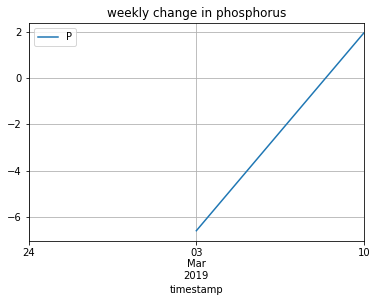

In [ ]:
weekly_diff_phosphorus.plot(grid = True)
plt.title("weekly change in phosphorus")
plt.show()


###  Percentage Change in phosphorus

In [ ]:
change_phosphorus = df_phosphorus.pct_change().round(3)
print(change_phosphorus.head(7))

                P
timestamp        
2019-02-24    NaN
2019-03-03 -0.113
2019-03-10  0.038
